In [4]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-08-12 04:59:49--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-08-12 04:59:49 (93.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [19]:
dataset = pd.get_dummies(dataset)
x = dataset.drop(columns=['expenses'])
y = dataset['expenses']

# Split the data into training (80%) and testing (20%) sets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, test_size=0.2)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer='Adam',
    loss='mse',  # Mean Squared Error
    metrics=['mae', 'mse']  # Mean Absolute Error
)

history = model.fit(
    train_dataset , train_labels,
    epochs=500,
    callbacks=[tfdocs.modeling.EpochDots()],
    verbose=0
)

/home/mostafa/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch: 0, loss:333462752.0000,  mae:13466.9375,  mse:333462752.0000,  
....................................................................................................
Epoch: 100, loss:93767840.0000,  mae:7664.5049,  mse:93767840.0000,  
....................................................................................................
Epoch: 200, loss:33031132.0000,  mae:3730.4128,  mse:33031132.0000,  
....................................................................................................
Epoch: 300, loss:30192772.0000,  mae:3377.8872,  mse:30192772.0000,  
....................................................................................................
Epoch: 400, loss:28155276.0000,  mae:3194.6929,  mse:28155276.0000,  
....................................................................................................

9/9 - 0s - 9ms/step - loss: 28800662.0000 - mae: 3113.2937 - mse: 28800662.0000
Testing set Mean Abs Error: 3113.29 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


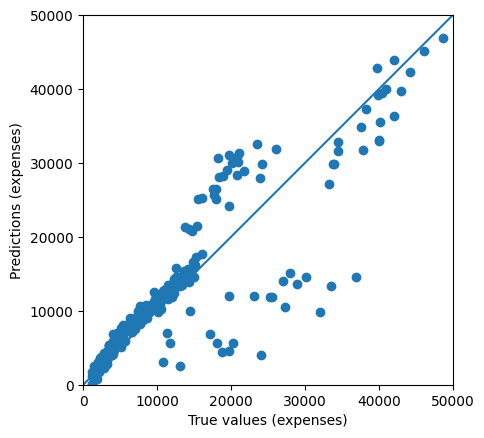

In [20]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
